# Planteamiento de ideas

- ¿Qué comunidades tienen más camas por habitante?
- ¿Hay relación entre el número de camas en hospitales y la inversión por CCAA?
- ¿Qué comunidades gastan más en sanidad por habitante?
- ¿Hay relación entre el gasto en sanidad y las máquinas médicas?
- ¿Hay relación entre el PIB y el gasto en sanidad?

# Cuerpo

In [7]:
#Importamos las librerias
import sqlite3
import pandas as pd

#Conexión de base de datos
conn = sqlite3.connect('database_eda')
cursor = conn.cursor()

## ¿Qué comunidades tienen más camas por habitante?

In [38]:
#SELECCIÓN DE LOS DATOS
query='''
SELECT H.COMUNIDAD_AUTONOMA, SUM(H.NUMERO_DE_CAMAS) AS NUMERO_CAMAS, P.POBLACION
FROM HOSPITALES H
JOIN POBLACION P ON H.COMUNIDAD_AUTONOMA = P.COMUNIDAD_AUTONOMA
GROUP BY H.COMUNIDAD_AUTONOMA;
'''

df = pd.read_sql_query(query, conn)
df['CAMAS_1000_HABITANTES'] = (df['NUMERO_CAMAS']/df['POBLACION'])*1000
df = df.sort_values(by='CAMAS_1000_HABITANTES', ascending=False)
df

COMUNIDAD_AUTONOMA  NUMERO_CAMAS  POBLACION  CAMAS_1000_HABITANTES
7               CATALUÑA         34322    7675217               4.471795
10           EXTREMADURA          4323    1067710               4.048852
1                 ARAGÓN          5290    1319291               4.009729
2               ASTURIAS          3930    1022800               3.842393
5        CASTILLA Y LEÓN          9130    2399548               3.804883
11               GALICIA          9767    2699499               3.618079
18            PAÍS VASCO          7975    2207776               3.612232
17               NAVARRA          2331     654214               3.563054
12         ILLES BALEARS          3976    1149460               3.459016
13              LA RIOJA          1050     316798               3.314415
14                MADRID         21700    6663394               3.256599
16                MURCIA          4862    1493898               3.254573
3               CANARIAS          6828    2153389               3.170816
8                  CEUTA           252      84777               2.972504
6     CASTILLA-LA MANCHA          5899    2032863               2.901819
4              CANTABRIA          1682     581078               2.894620
9   COMUNIDAD VALENCIANA         13811    5003769               2.760119
0              ANDALUCÍA         21350    8414240               2.537365
15               MELILLA           170      86487               1.965613

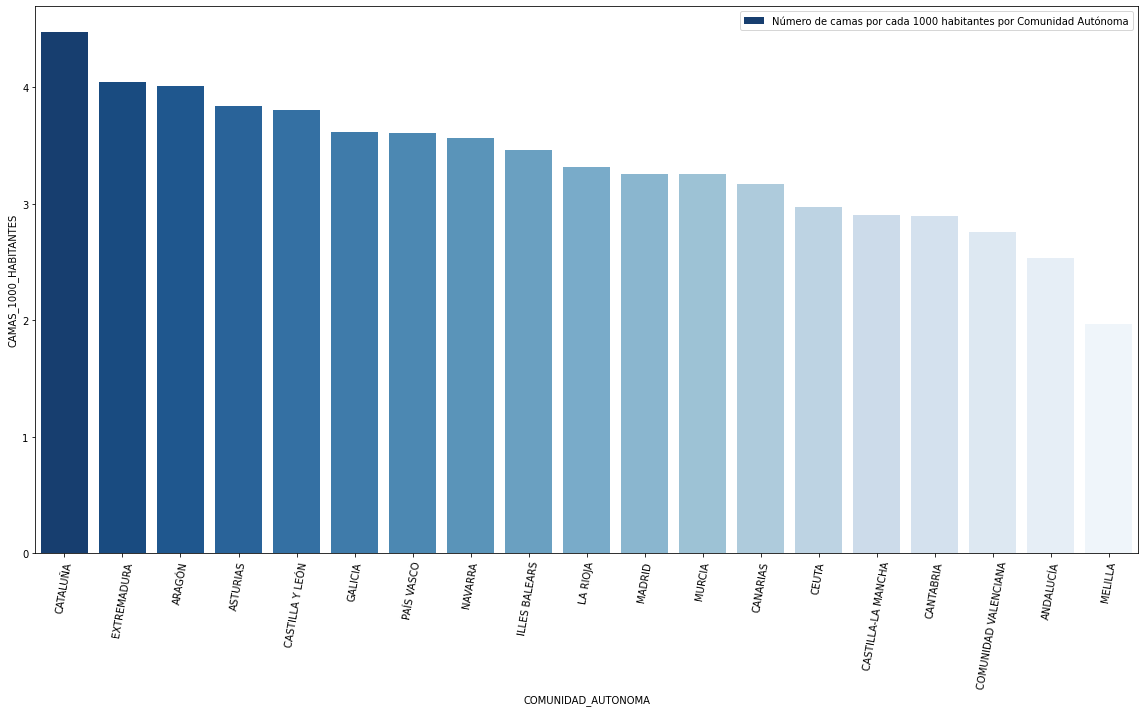

In [47]:
#GRÁFICA DE LOS DATOS
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
g = sns.barplot(
    x = 'COMUNIDAD_AUTONOMA',
    y = 'CAMAS_1000_HABITANTES',
    palette = 'Blues_r',
    label = 'Número de camas por cada 1000 habitantes por Comunidad Autónoma',
    data = df
)
plt.xticks(rotation=80);
plt.legend(loc='best');

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('comunidades_mas_camas.jpeg', dpi=100)

## ¿Qué comunidades gastan más en sanidad por habitante?

In [9]:
#SELECCIÓN DE LOS DATOS
query='''
SELECT G.COMUNIDAD_AUTONOMA, G.GASTO_SANIDAD, P.POBLACION
FROM GASTO_SANIDAD G
JOIN POBLACION P ON G.COMUNIDAD_AUTONOMA = P.COMUNIDAD_AUTONOMA
GROUP BY G.COMUNIDAD_AUTONOMA;
'''

df1 = pd.read_sql_query(query, conn)
df1['GASTO_HABITANTE'] = df1['GASTO_SANIDAD']/df1['POBLACION']
df1 = df1.sort_values(by='GASTO_HABITANTE', ascending=False)
df1

COMUNIDAD_AUTONOMA  GASTO_SANIDAD  POBLACION  GASTO_HABITANTE
2               ASTURIAS        1765509    1022800         1.726153
16            PAÍS VASCO        3770794    2207776         1.707960
15               NAVARRA        1086649     654214         1.660999
9            EXTREMADURA        1718749    1067710         1.609753
1                 ARAGÓN        2000557    1319291         1.516388
11         ILLES BALEARS        1730482    1149460         1.505474
4              CANTABRIA         874228     581078         1.504493
5        CASTILLA Y LEÓN        3592949    2399548         1.497344
10               GALICIA        3987978    2699499         1.477303
3               CANARIAS        3014185    2153389         1.399740
12              LA RIOJA         438983     316798         1.385687
6     CASTILLA-LA MANCHA        2806827    2032863         1.380726
8   COMUNIDAD VALENCIANA        6635407    5003769         1.326082
14                MURCIA        1919543    1493898         1.284922
0              ANDALUCÍA       10539999    8414240         1.252638
13                MADRID        8108966    6663394         1.216942
7               CATALUÑA        8876083    7675217         1.156460

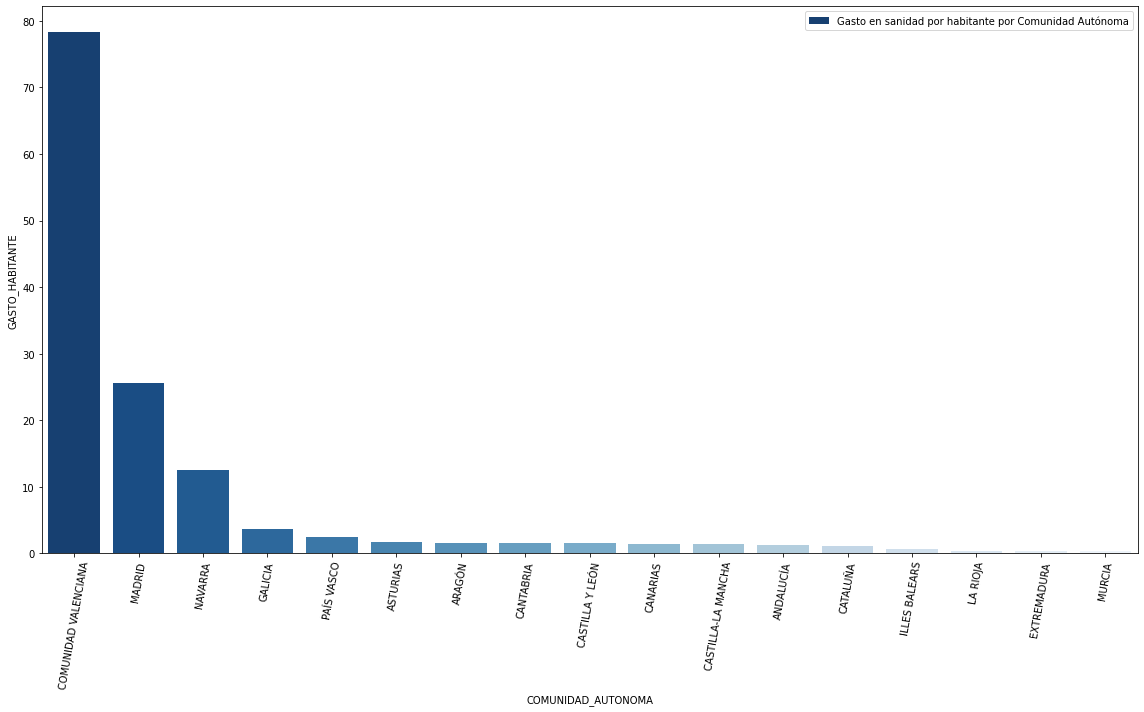

In [48]:
#GRÁFICA DE LOS DATOS
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.barplot(
    x = 'COMUNIDAD_AUTONOMA',
    y = 'GASTO_HABITANTE',
    palette = 'Blues_r',
    label = 'Gasto en sanidad por habitante por Comunidad Autónoma',
    data = df1
)
plt.xticks(rotation=80)
plt.legend(loc='best');

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('gasto_sanidad_habitante.jpeg', dpi=100)

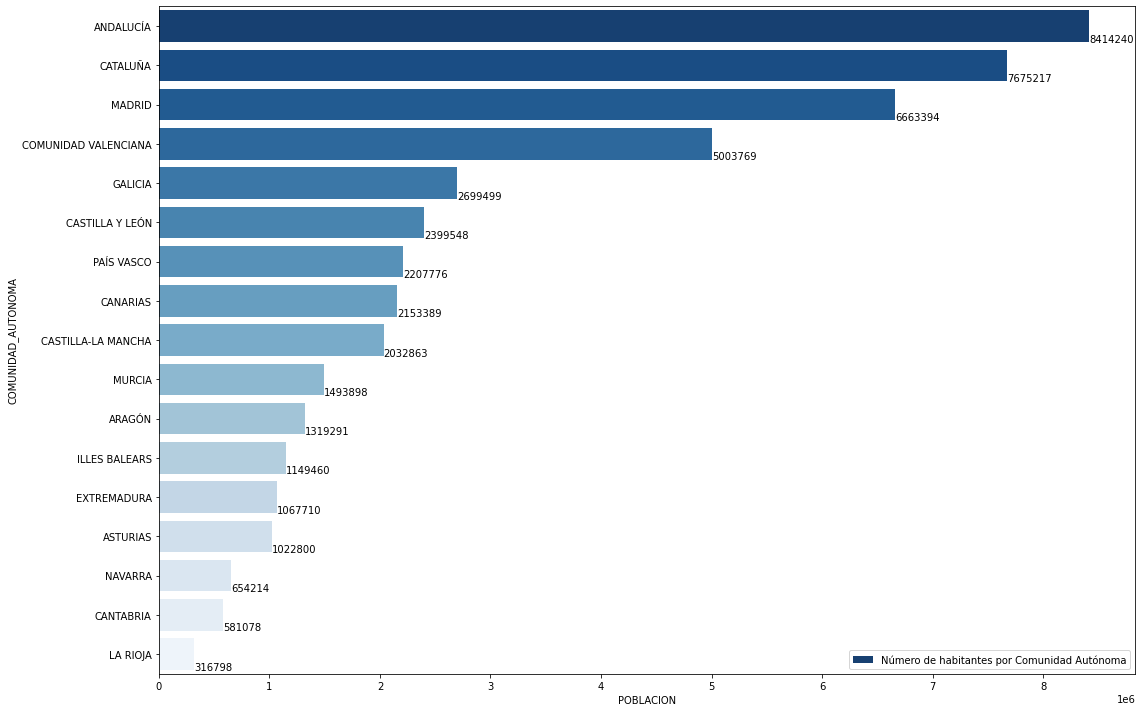

In [15]:
#GRÁFICA DE LOS DATOS
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df1.sort_values(by='POBLACION', ascending=False)

import numpy as np

def show_values_on_bars(axs, h_v="v", space=0.3):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.figure(figsize=(16,10))
g = sns.barplot(
    y = 'COMUNIDAD_AUTONOMA',
    x = 'POBLACION',
    palette = 'Blues_r',
    label = 'Número de habitantes por Comunidad Autónoma',
    data = df1
)
plt.legend(loc='best');

show_values_on_bars(g, 'h', 0.3)

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('./img/poblacion_ccaa.jpeg', dpi=100)

## ¿Hay relación entre el número de camas en hospitales y la inversión por CCAA?

In [3]:
#SELECCIÓN DE LOS DATOS
query='''
SELECT H.COMUNIDAD_AUTONOMA, SUM(H.NUMERO_DE_CAMAS) AS NUMERO_CAMAS, G.GASTO_SANIDAD, P.POBLACION
FROM HOSPITALES H
JOIN GASTO_SANIDAD G ON H.COMUNIDAD_AUTONOMA = G.COMUNIDAD_AUTONOMA
JOIN POBLACION P ON H.COMUNIDAD_AUTONOMA = P.COMUNIDAD_AUTONOMA
GROUP BY H.COMUNIDAD_AUTONOMA;
'''

df2 = pd.read_sql_query(query, conn)
df2['CAMAS_1000_HABITANTES'] = (df2['NUMERO_CAMAS']/df2['POBLACION'])*1000
df2['GASTO_HABITANTE'] = df2['GASTO_SANIDAD']/df2['POBLACION']
df2.corr()

NUMERO_CAMAS  GASTO_SANIDAD  POBLACION  \
NUMERO_CAMAS               1.000000       0.925751   0.945239   
GASTO_SANIDAD              0.925751       1.000000   0.994465   
POBLACION                  0.945239       0.994465   1.000000   
CAMAS_1000_HABITANTES      0.131022      -0.161583  -0.146824   
GASTO_HABITANTE           -0.690896      -0.661212  -0.713639   

                       CAMAS_1000_HABITANTES  GASTO_HABITANTE  
NUMERO_CAMAS                        0.131022        -0.690896  
GASTO_SANIDAD                      -0.161583        -0.661212  
POBLACION                          -0.146824        -0.713639  
CAMAS_1000_HABITANTES               1.000000         0.290934  
GASTO_HABITANTE                     0.290934         1.000000

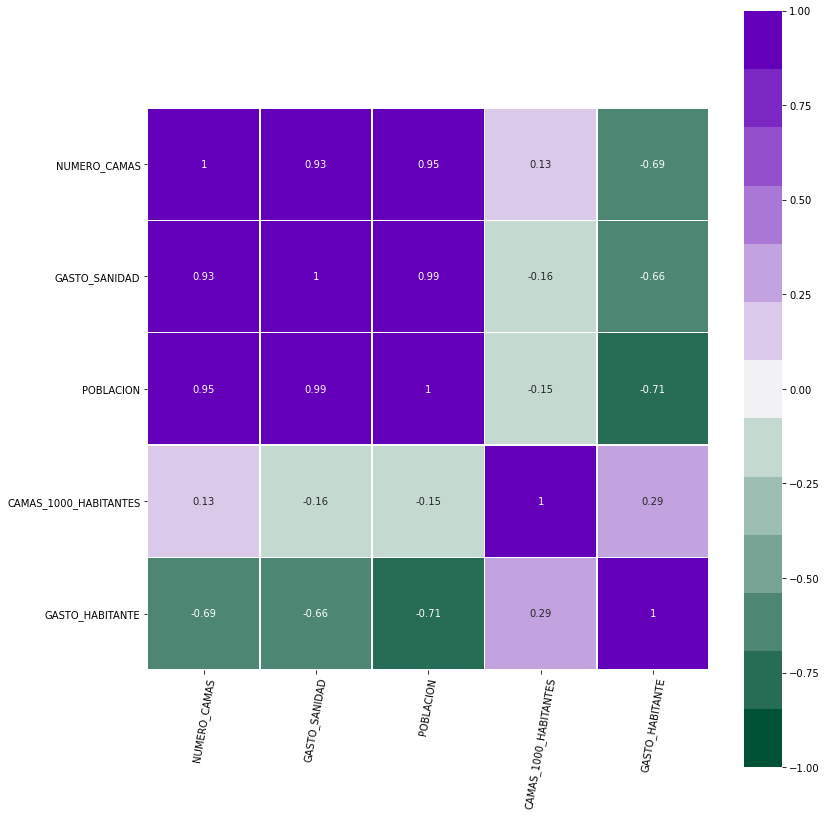

In [4]:
#GRÁFICA DE LOS DATOS
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(),
           vmin = -1,
           vmax = 1,
           annot=True, #Introduzco los números dentro de cada recuadro
           square = True, #Obtengo cuadrados en vex de rectángulos
           linewidths = .5, #Margen entre cuadrados
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13))
plt.yticks(rotation=0)
plt.xticks(rotation=80);

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('relacion_gasto_camas.jpeg', dpi=100)

In [50]:
import plotly.express as px

df2 = df2.sort_values(by='NUMERO_CAMAS', ascending=False)

fig = px.bar(
    df2,
    x = 'COMUNIDAD_AUTONOMA',
    y = 'CAMAS_1000_HABITANTES',
    color = 'GASTO_HABITANTE'
)

fig.show();

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('camas_gasto.jpeg', dpi=100)

<Figure size 432x288 with 0 Axes>

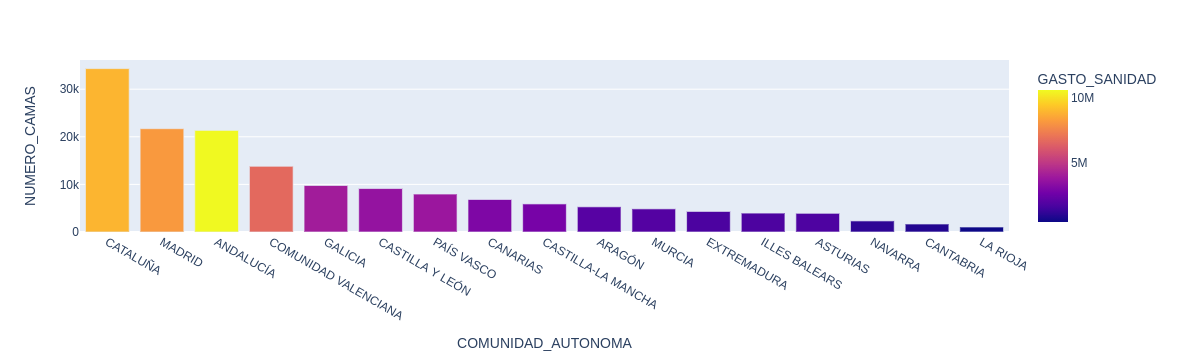

<Figure size 432x288 with 0 Axes>

In [51]:
import plotly.express as px

df2 = df2.sort_values(by='NUMERO_CAMAS', ascending=False)

fig = px.bar(
    df2,
    x = 'COMUNIDAD_AUTONOMA',
    y = 'NUMERO_CAMAS',
    color = 'GASTO_SANIDAD'
)

fig.show();

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('camas_gasto_2.jpeg', dpi=100)

## A más inversión, mayor número de maquinaria sanitaria

In [25]:
query = '''
SELECT E.*, G.GASTO_SANIDAD, P.POBLACION
FROM EQUIPO_MEDICO E
JOIN GASTO_SANIDAD G ON E.COMUNIDAD_AUTONOMA = G.COMUNIDAD_AUTONOMA
JOIN POBLACION P ON E.COMUNIDAD_AUTONOMA = P.COMUNIDAD_AUTONOMA
GROUP BY E.COMUNIDAD_AUTONOMA;
'''

df3 = pd.read_sql_query(query, conn)
df3['TOTAL_MAQUINAS'] = df3.loc[:, 'TAC':'DIAL'].sum(axis=1)
df3['MAQUINA_HABITANTE'] = df3['TOTAL_MAQUINAS']/df3['POBLACION']
df3['GASTO_HABITANTE'] = df3['GASTO_SANIDAD']/df3['POBLACION']
df3 = df3[['COMUNIDAD_AUTONOMA',
          'GASTO_SANIDAD',
          'POBLACION',
          'TOTAL_MAQUINAS',
          'MAQUINA_HABITANTE',
          'GASTO_HABITANTE']]
df3

COMUNIDAD_AUTONOMA  GASTO_SANIDAD  POBLACION  TOTAL_MAQUINAS  \
0              ANDALUCÍA       10539999    8414240            1238   
1                 ARAGÓN        2000557    1319291             336   
2               ASTURIAS        1765509    1022800             260   
3               CANARIAS        3014185    2153389             528   
4              CANTABRIA         874228     581078              52   
5        CASTILLA Y LEÓN        3592949    2399548             487   
6     CASTILLA-LA MANCHA        2806827    2032863             237   
7               CATALUÑA        8876083    7675217            1287   
8   COMUNIDAD VALENCIANA        6635407    5003769            1003   
9            EXTREMADURA        1718749    1067710             188   
10               GALICIA        3987978    2699499             663   
11         ILLES BALEARS        1730482    1149460             308   
12              LA RIOJA         438983     316798              63   
13                MADRID        8108966    6663394            1370   
14                MURCIA        1919543    1493898             228   
15               NAVARRA        1086649     654214             166   
16            PAÍS VASCO        3770794    2207776             366   

    MAQUINA_HABITANTE  GASTO_HABITANTE  
0            0.000147         1.252638  
1            0.000255         1.516388  
2            0.000254         1.726153  
3            0.000245         1.399740  
4            0.000089         1.504493  
5            0.000203         1.497344  
6            0.000117         1.380726  
7            0.000168         1.156460  
8            0.000200         1.326082  
9            0.000176         1.609753  
10           0.000246         1.477303  
11           0.000268         1.505474  
12           0.000199         1.385687  
13           0.000206         1.216942  
14           0.000153         1.284922  
15           0.000254         1.660999  
16           0.000166         1.707960

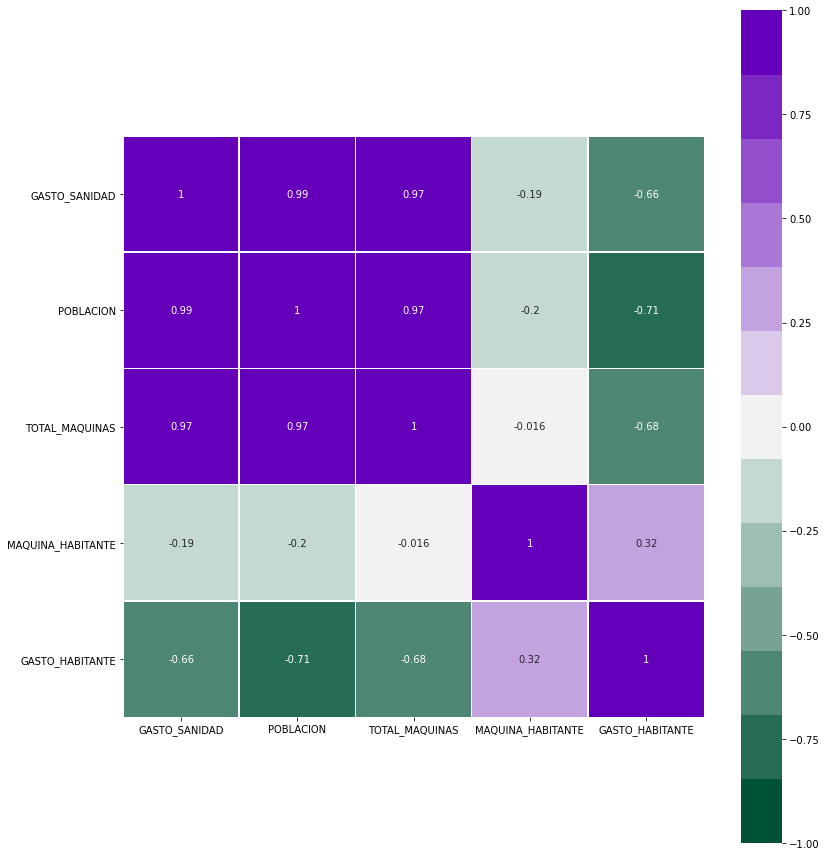

In [52]:
#GRÁFICA DE LOS DATOS
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(df3.corr(),
           vmin = -1,
           vmax = 1,
           annot=True, #Introduzco los números dentro de cada recuadro
           square = True, #Obtengo cuadrados en vex de rectángulos
           linewidths = .5, #Margen entre cuadrados
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13))
plt.yticks(rotation=0);

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('relacion_gasto_maquinas.jpeg', dpi=100)

## Relación entre PIB per capita y gasto en sanidad per capita

In [56]:
query = '''
SELECT PI.*, G.GASTO_SANIDAD, P.POBLACION, ROUND(CAST(PI.PIB AS FLOAT)/CAST(P.POBLACION AS FLOAT), 5) AS PIB_PER_CAPITA,
        ROUND(CAST(G.GASTO_SANIDAD AS FLOAT)/CAST(P.POBLACION AS FLOAT), 5) AS GASTO_HABITANTE
FROM PIB PI
JOIN POBLACION P ON PI.COMUNIDAD_AUTONOMA = P.COMUNIDAD_AUTONOMA
JOIN GASTO_SANIDAD G ON P.COMUNIDAD_AUTONOMA = G.COMUNIDAD_AUTONOMA
GROUP BY PI.COMUNIDAD_AUTONOMA;
'''

df4 = pd.read_sql_query(query, conn)
df4

COMUNIDAD_AUTONOMA           PIB  GASTO_SANIDAD  POBLACION  \
0              ANDALUCÍA  165866000000       10539999    8414240   
1                 ARAGÓN   38044000000        2000557    1319291   
2               ASTURIAS   23765000000        1765509    1022800   
3               CANARIAS   47164000000        3014185    2153389   
4              CANTABRIA   14187000000         874228     581078   
5        CASTILLA Y LEÓN   59795000000        3592949    2399548   
6     CASTILLA-LA MANCHA   42820000000        2806827    2032863   
7               CATALUÑA  236814000000        8876083    7675217   
8   COMUNIDAD VALENCIANA  116015000000        6635407    5003769   
9            EXTREMADURA   20677000000        1718749    1067710   
10               GALICIA   64430000000        3987978    2699499   
11         ILLES BALEARS   33800000000        1730482    1149460   
12              LA RIOJA    8867000000         438983     316798   
13                MADRID  240130000000        8108966    6663394   
14                MURCIA   32256000000        1919543    1493898   
15               NAVARRA   20973000000        1086649     654214   
16            PAÍS VASCO   74496000000        3770794    2207776   

    PIB_PER_CAPITA  GASTO_HABITANTE  
0      19712.53494          1.25264  
1      28836.70092          1.51639  
2      23235.23661          1.72615  
3      21902.22017          1.39974  
4      24414.96667          1.50449  
5      24919.27646          1.49734  
6      21063.88871          1.38073  
7      30854.37194          1.15646  
8      23185.52275          1.32608  
9      19365.74538          1.60975  
10     23867.39169          1.47730  
11     29405.11197          1.50547  
12     27989.44438          1.38569  
13     36037.19066          1.21694  
14     21591.83559          1.28492  
15     32058.31731          1.66100  
16     33742.55359          1.70796

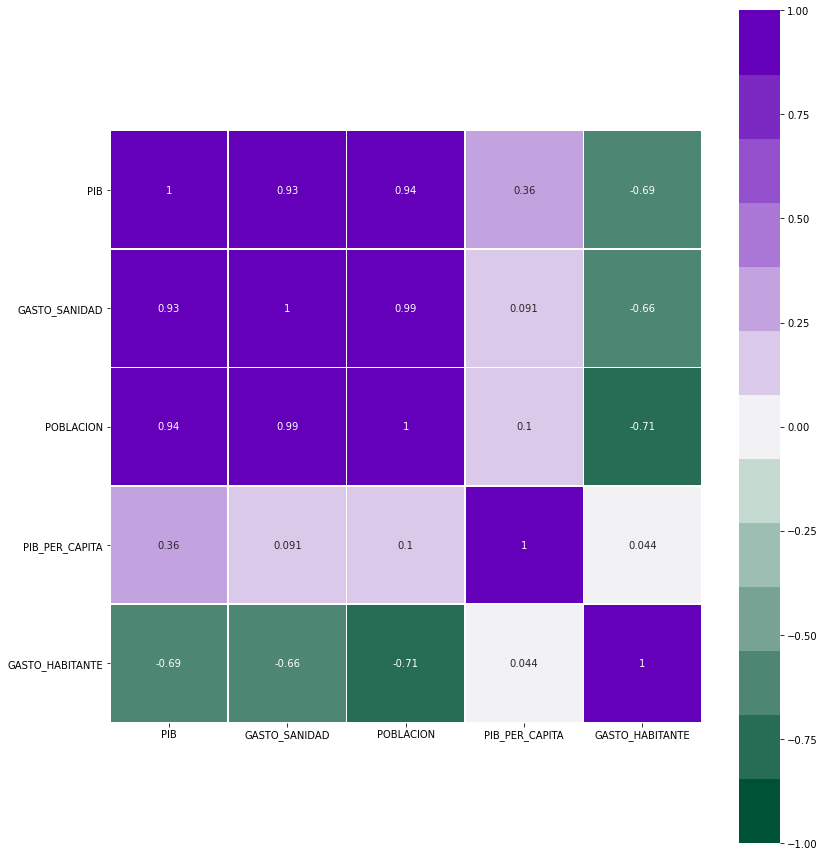

In [58]:
#GRÁFICA DE LOS DATOS
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(df4.corr(),
           vmin = -1,
           vmax = 1,
           annot=True, #Introduzco los números dentro de cada recuadro
           square = True, #Obtengo cuadrados en vex de rectángulos
           linewidths = .5, #Margen entre cuadrados
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13))
plt.yticks(rotation=0);

plt.tight_layout() #sirve apra que no corte bordes
plt.savefig('./img/relacion_gasto_pib.jpeg', dpi=100)